In [ ]:
## Data mining is the process of exploring data and finding
## patterns in it using machine learning, statistics, and
## database systems, End goal of data mining is to derive
## useful information from data, which can be utilized to
## increase revenue, reduce costs, or even save lives through
## some of its applications

In [ ]:
## Domain + Statistics
## Domain ^ Statistics => analysis sweet spot

In [ ]:
## if you have the sales data of a Fast Moving Consumer Goods (FMCG)
## Brand Behaviour
## Outlet Behavior
## Growth Products
## Seasonal effect on products

In [ ]:
#### Understand the domain
#### Understand the data
#### Create Themes
#### Create Questions under themes

In [ ]:
## Lets explore Titanic Data Set

In [1]:
import pandas as pd
import pylab as plt
import numpy as np

In [3]:
df = pd.read_csv("C:\\data\\titanic_train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df['Pclass'].isnull().value_counts()

False    891
Name: Pclass, dtype: int64

In [7]:
df['Survived'].isnull().value_counts()

False    891
Name: Survived, dtype: int64

In [8]:
### Passengers survived in each class
survivors = df.groupby('Pclass')['Survived'].agg(sum)

In [9]:
survivors

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [10]:
total_passengers = df.groupby('Pclass')['PassengerId'].count()

In [11]:
total_passengers

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [23]:
survivor_percentage = survivors/total_passengers

In [24]:
survivor_percentage

Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64

In [ ]:
## plotting the total no.of survivors

In [13]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [15]:
ax = fig.add_subplot(111)

In [16]:
rect = ax.bar(survivors.index.values.tolist(), 
             survivors, color='blue', width=0.5)
ax.set_ylabel('No. of Survivors')
ax.set_title('Total number of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())

In [17]:
xtickNames = ax.set_xticklabels(xTickMarks)

In [18]:
plt.setp(xtickNames, fontsize=20)

[None, None, None, None, None, None]

In [19]:
plt.show()

In [20]:
### Plotting the percentage of survivors in each class
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [21]:
ax = fig.add_subplot(111)

In [25]:
rect= ax.bar(survivor_percentage.index.values.tolist(),
            survivor_percentage, color='blue', width=0.5)

In [26]:
ax.set_ylabel('Survivor Percentage')

Text(0, 0.5, 'Survivor Percentage')

In [27]:
ax.set_title('Percentage of survivors based on class')

Text(0.5, 1.0, 'Percentage of survivors based on class')

In [28]:
xTickMarks = survivors.index.values.tolist()

In [29]:
ax.set_xticks(survivors.index.values.tolist())

In [30]:
xtickNames = ax.set_xticklabels(xTickMarks)

In [31]:
plt.setp(xtickNames, fontsize=20)

[None, None, None, None, None, None]

In [32]:
plt.show()

In [ ]:
## The maximum no. of survivors are in the first and third class
## w.r.t total number of passengers in each class, first class has the 
## maximum survivors at around 61%
## w.r.t total no.of passengers in each class, third class has
## minimum no.of survivors at around 25%

## This was clearly a preference toward saving those the first class
## as the ship is drowning. It also had maximum percentage of survivors

In [ ]:
# What is the distribution of survivors based on gender among
## the various classes

In [33]:
# checking for any null values
df['Sex'].isnull().value_counts()

False    891
Name: Sex, dtype: int64

In [38]:
## male passengers survived in each class
male_survivors = df[df['Sex']=='male'].groupby('Pclass')['Survived'].agg(sum)

In [39]:
male_survivors

Pclass
1    45
2    17
3    47
Name: Survived, dtype: int64

In [40]:
male_total_passengers = df[df['Sex']=='male'].groupby('Pclass')['PassengerId'].count()

In [41]:
male_total_passengers

Pclass
1    122
2    108
3    347
Name: PassengerId, dtype: int64

In [46]:
male_survivor_percentage = male_survivors/male_total_passengers

In [47]:
male_survivor_percentage

Pclass
1    0.368852
2    0.157407
3    0.135447
dtype: float64

In [ ]:
## Female survivors

In [42]:
female_survivors = df[df['Sex']=='female'].groupby('Pclass')['Survived'].agg(sum)

In [43]:
##total female passengers in each class
female_total_passengers = df[df['Sex']=='female'].groupby('Pclass')['PassengerId'].count()

In [44]:
female_survivor_percentage = female_survivors/female_total_passengers

In [45]:
female_survivor_percentage

Pclass
1    0.968085
2    0.921053
3    0.500000
dtype: float64

In [48]:
## plotting the total passengers who survived based on gender

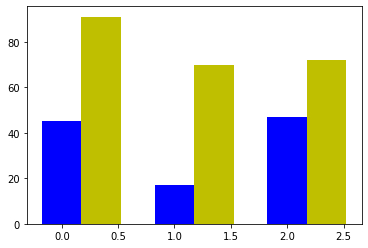

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivors.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivors, bar_width, color='blue', label='Men')
rect2 = ax.bar(index+bar_width, female_survivors, bar_width, color='y', label='Women')

In [53]:
ax.set_ylabel('Survivor Numbers')
ax.set_title('Male and Female survivors based on class')
xTickMarks = male_survivors.index.values.tolist()
ax.set_xticks(index+bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)

No handles with labels found to put in legend.


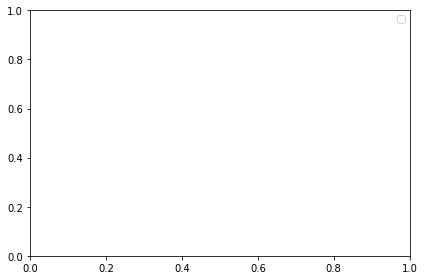

In [55]:
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

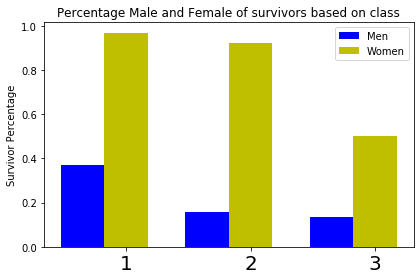

In [57]:
#Plotting the percentage of passengers who survived based on gender
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivor_percentage.count())
bar_width=0.35
rect1 = ax.bar(index, male_survivor_percentage, bar_width, color='blue', label='Men')
rect2 = ax.bar(index+bar_width, female_survivor_percentage,
              bar_width, color='y', label='Women')
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage Male and Female of survivors based on class')
xTickMarks = male_survivor_percentage.index.values.tolist()
ax.set_xticks(index+bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
### Female passengers were given preference for lifeboats and the majority  were saved. 

In [ ]:
# What is the distribution of nonsurvivors among the various classes
## who have family aboard the ship?

In [58]:
df['SibSp'].isnull().value_counts()

False    891
Name: SibSp, dtype: int64

In [59]:
df['Parch'].isnull().value_counts()

False    891
Name: Parch, dtype: int64

In [61]:
non_survivors = df[(df['SibSp'] > 0) | (df['Parch'] > 0) & (df['Survived'] == 0)].groupby('Pclass')['Survived'].agg('count')

In [62]:
non_survivors

Pclass
1     88
2     66
3    153
Name: Survived, dtype: int64

In [63]:
total_passengers = df.groupby('Pclass')['PassengerId'].count()

In [64]:
non_survivor_percentage = non_survivors/total_passengers

In [65]:
non_survivor_percentage

Pclass
1    0.407407
2    0.358696
3    0.311609
dtype: float64

In [66]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [67]:
ax = fig.add_subplot(111)

In [68]:
rect = ax.bar(non_survivors.index.values.tolist(), non_survivors, 
             color='blue', width=0.5)

In [69]:
ax.set_ylabel('No. of non survivors')

Text(0, 0.5, 'No. of non survivors')

In [70]:
ax.set_title('Total number of non survivors with family based on class')

Text(0.5, 1.0, 'Total number of non survivors with family based on class')

In [71]:
xTickMarks = non_survivors.index.values.tolist()

In [72]:
ax.set_xticks(non_survivors.index.values.tolist())

In [73]:
xtickNames = ax.set_xticklabels(xTickMarks)

In [74]:
plt.setp(xtickNames, fontsize=20)

[None, None, None, None, None, None]

In [75]:
plt.show()

In [ ]:
fig = plt.figure() 

In [77]:
ax = fig.add_subplot(111)
rect = ax.bar(non_survivor_percentage.index.values.tolist(),non_survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Non Survivor Percentage')
ax.set_title('Percentage of non survivors with family based on class')

C:\Users\krish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Percentage of non survivors with family based on class')

In [78]:
xTickMarks = non_survivor_percentage.index.values.tolist()
ax.set_xticks(non_survivor_percentage.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

In [ ]:
# What is the survival percentage among different age groups

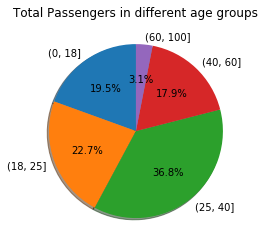

In [79]:
#Checking for null values
df['Age'].isnull().value_counts()

#Defining the age binning interval
age_bin = [0, 18, 25, 40, 60, 100]
#Creating the bins
df['AgeBin'] = pd.cut(df.Age, bins=age_bin)
#Removing the null rows
d_temp = df[np.isfinite(df['Age'])]
#Removing all na instances
#Number of survivors based on Age bin
survivors = d_temp.groupby('AgeBin')['Survived'].agg(sum)
#Total passengers in each bin
total_passengers = d_temp.groupby('AgeBin')['Survived'].agg('count')
#Plotting the pie chart of total passengers in each bin
plt.pie(total_passengers,labels=total_passengers.index.values.tolist(),autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Total Passengers in different age groups')
plt.show()

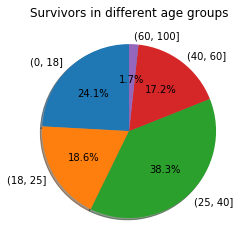

In [80]:
 #Plotting the pie chart of percentage passengers in each bin
plt.pie(survivors, labels=survivors.index.values.tolist(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Survivors in different age groups')
plt.show()

In [81]:
## The 25-40 age group has the maximum number of passengers, and 0-18 has the second highest number of passengers 

## Among the people who survived, the 18-25 age group has the second highest number of survivors

## The 60-100 age group has a lower proportion among the survivors 

## The 25-40 age group had the maximum number of survivors compared to any other age group, and people who were old were either not lucky enough or made way for the younger people to the lifeboats. 